# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Introduction to Portfolio Optimization

- Calculate Maximum Drawdown
- Calculate Annualised Returns and Annualised Volatility
- Calculate Covariance Matrix
- Calculate Sharpe Ratio
- Calculate Portfolio Return and Portfolio Volatility


In [42]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *
import edhec_risk_kit as erk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

## Import Industry Returns

In [43]:
data = erk.get_ind_returns()

In [44]:
data.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


## Maximum Drawdown

Maximum drawdown of Food Industry

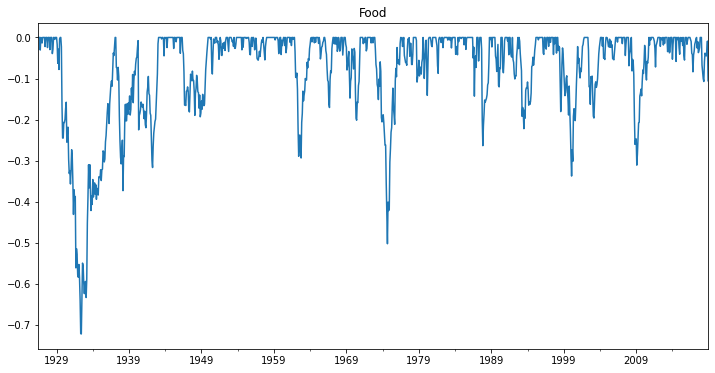

In [45]:
erk.drawdown(data.Food)['Drawdown'].plot.line(title='Food', figsize=(12,6))
plt.show()

Maximum Drawdown of Beer Industry

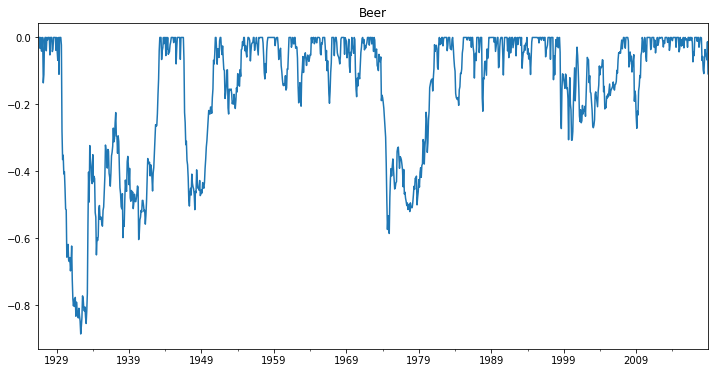

In [46]:
erk.drawdown(data.Beer)['Drawdown'].plot.line(title='Beer', figsize=(12,6))
plt.show()

Cornish-Fisher VaR of selected industries

In [47]:
ind = ['Food', 'Smoke', 'Coal', 'Beer', 'Fin']
erk.var_gaussian(data[ind], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

Cornish-Fisher VaR of all industries sorted in ascending orders.  Beer has the lowest VaR and Mines is the most risky.

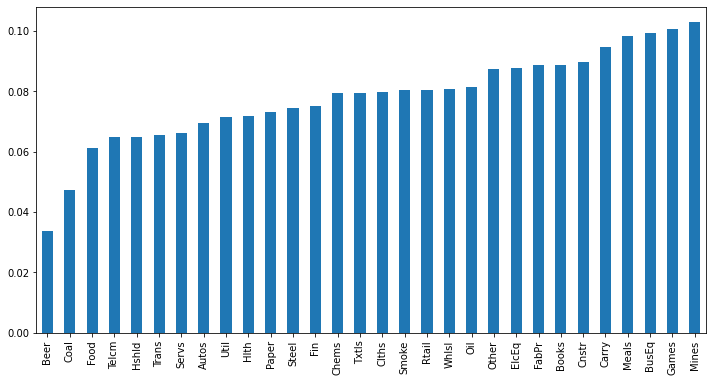

In [48]:
erk.var_gaussian(data, modified=True).sort_values().plot.bar(figsize=(12,6))
plt.show()

Annualised Returns across all industries between 1995 and 2000

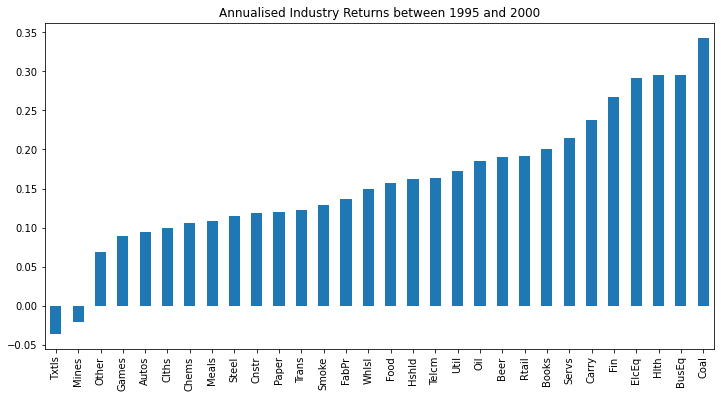

In [49]:
er = erk.annualize_rets(data['1995':'2000'], 12)
er.sort_values().plot.bar(figsize=(12,6), title="Annualised Industry Returns between 1995 and 2000")
plt.show()

Annualised Volatility across all industries between 1995 and 2000

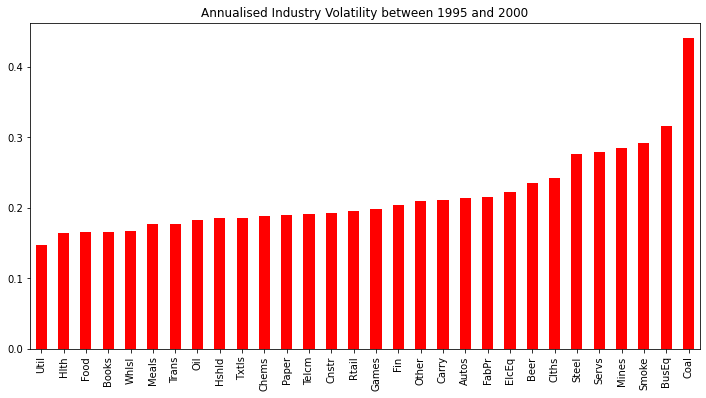

In [50]:
vol = erk.annualize_vol(data['1995':'2000'], 12)
vol.sort_values().plot.bar(figsize=(12,6), title="Annualised Industry Volatility between 1995 and 2000", color='red')
plt.show()

Covariance Matrix of returns across all industries between 1995 and 2000

In [51]:
cov = data['1995':'2000'].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


## Sharpe Ratio

Sharpe Ratio = Annualised Excess Returns / Annualised Volatility

Inputs
- Returns -> To take note the frequency of return data in the inputs
- Annual Risk-Free Rate
- Periods per Year

Using all data from Year 1926 to 2018

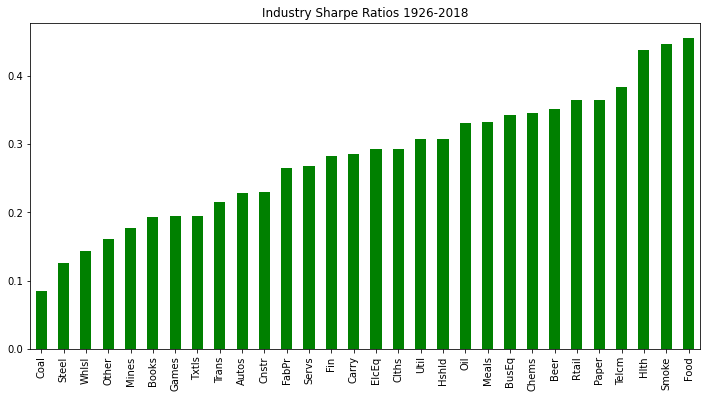

In [52]:
erk.sharpe_ratio(data,0.03,12).sort_values().plot.bar(figsize=(12,6), 
                                                      title="Industry Sharpe Ratios 1926-2018", 
                                                      color='green')
plt.show()

Slicing data from Year 2000 to 2018

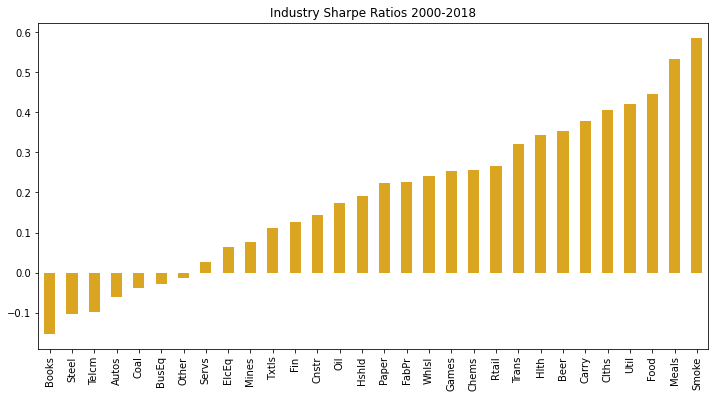

In [53]:
erk.sharpe_ratio(data['2000':],0.03,12).sort_values().plot.bar(figsize=(12,6), 
                                                               title="Industry Sharpe Ratios 2000-2018", 
                                                               color='goldenrod')
plt.show()

## Portfolio Return and Volatility

Using industry returns, select a sample list of interested industries for the portfolio.  Assuming equally weighted investment in each industry in the portfolio.

In [54]:
l = ['Food','Beer','Smoke','Coal']

Expected returns on each industry

In [55]:
er[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

Covariance Matrix of the industries

In [56]:
print(cov.loc[l,l])

           Food      Beer     Smoke      Coal
Food   0.002287  0.002077  0.001757  0.000034
Beer   0.002077  0.004599  0.001143  0.001261
Smoke  0.001757  0.001143  0.007130 -0.000544
Coal   0.000034  0.001261 -0.000544  0.016153


Setting the weights to be equal

In [57]:
weights = np.repeat(1/4, 4)

Portfolio Returns

In [58]:
erk.portfolio_return(weights, er[l])

0.20496820684146116

Portfolio Volatility

In [59]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.05100412722141178

## Returns and Volatility of a 2-Asset Portfolio

Analysis to show how the returns and volatility of a 2-asset portfolio changes with asset weights

In [60]:
l = ['Games', 'Fin']
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

Calculate and plot the portfolio returns and volatility across various weights.

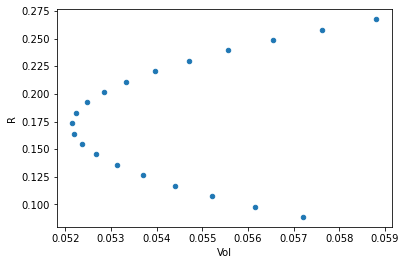

In [61]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]

ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")
plt.show()

## Weights of optimal portfolio given a target return

There exists a optimal set of weights in the portfolio such that one can achieve a target return with minimum volatility.  This is also known as the efficient frontier.

In [62]:
target_return = 0.10
wgt = erk.minimize_vol(target_return, er[l], cov.loc[l,l])
volatility = erk.portfolio_vol(wgt, cov.loc[l,l])

print('Minimum volatility: {:.2f}'.format(volatility))
print('Portfolio weights: {}'.format(wgt))

Minimum volatility: 0.06
Portfolio weights: [0.93704081 0.06295919]


## Efficient Frontier for 2 Asset Portfolio

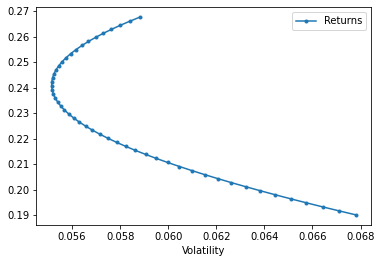

In [63]:
l = ['Beer', 'Fin']
erk.plot_ef2(50, er[l], cov.loc[l,l])
plt.show()

## Efficient Frontier for N Asset Portfolio

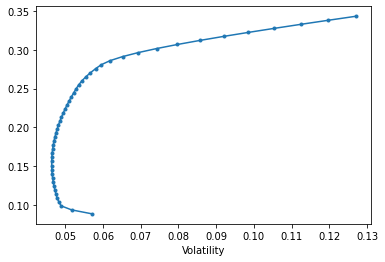

In [64]:
l = ['Smoke','Fin','Games','Coal']
erk.plot_ef(50, er[l], cov.loc[l,l])
plt.show()

## Finding the Maximum Sharpe Ratio (MSR) portfolio

Inputs:
1. Risk Free Rate
2. Expected Returns of Assets
3. Covariance Matrix of Assets

Outputs:
1. Weight of Assets

In [65]:
erk.msr(0.03, er[l], cov.loc[l,l])

array([7.16056110e-02, 7.87610828e-01, 2.23150491e-15, 1.40783561e-01])

## Finding the Global Minimum Volatility portfolio

Inputs:
1. Target Expected Return
2. Expected Returns of Assets
3. Covariance Matrix of Assets

Outputs:
1. Weight of Assets

In [66]:
erk.gmv(cov.loc[l,l])

array([0.25391906, 0.21288985, 0.46857413, 0.06461695])

## Capital Market Line - Introducting Risk Free Asset to the Markowitz Efficient Frontier 

The key points is that the efficient frontier dramatically changes shape when a risk-free asset is introduced.  We are trying to find the set of portfolios that have the highest possible return for a given volatility level or given volatility target.  The CML is a straight line that passes through the risk free portfolio and the maximum sharpe ratio portfolio.

All investor should hold a combination of thr risk-free asset and the portfolio that maximized the reward per risk ratio.

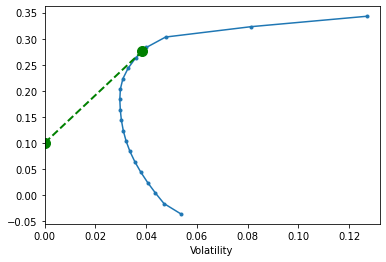

In [68]:
erk.plot_ef(20, er, cov, riskfree_rate = 0.1, show_cml=True)

## Lack of Robustness of Markowitz Analysis
- due to error in parameters estimates of expected returns and volatility
- optimizers tend to act as error maximizing machines
- there are reasons to believe that expected return estimates are much harder to obtain with a good degree of accuracy compared to variance-covariance matrix estimates
- the global minimum variance portfolio as being a very convenient portfolio in practice, because it is the only portfolio on the efficient frontier for which no parameter expected return estimates are needed

## Error maximizing nature of Markowitz
A slight change in asset returns estimation will lead to a significant change in asset allocation.  Hence it is difficult to allocate weights that will realistically give you the maximum sharpe ratio.

Returns and weights of original estimation

In [94]:
l = ['Food', 'Steel']
print(er[l])

Food     0.157362
Steel    0.115229
dtype: float64


In [95]:
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.91618083, 0.08381917])

Returns and weights of new estimation

In [96]:
new_er = np.array([0.14, 0.12])
new_er

array([0.14, 0.12])

In [97]:
erk.msr(0.1, new_er, cov.loc[l,l])

array([0.85023332, 0.14976668])

## Alternative portfolio allocation
Since Maximum Sharpe Ratio portfolio is difficult to construct, other portfolio allocation to consider as follows:

**Global Minimum Portfolio**: There is not need to optimise using expected returns estimation.  Hence, easier to allocate weight as such.  Note that estimating the covariance matrix is a lot easier to do than estimating returns. 

**Equally Weighted Portfolio**: Also known as the naive portfolio.  There is no optimisation and hence no estimation required.



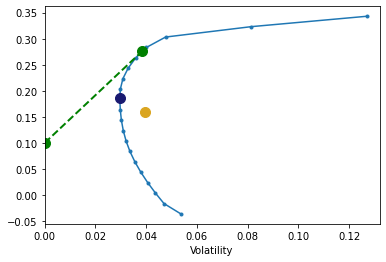

In [98]:
erk.plot_ef(20, er, cov, riskfree_rate = 0.1, show_cml=True, show_ew=True, show_gmv=True)
plt.show()